 Boxplot의 구성 요소 상세

In [ ]:
import pandas as pd
df = pd.read_csv('소상공인시장진흥공단_상가(상권)정보_서울_202510.csv')
df.head(2)

In [10]:
# 컬럼명중에 "코드" 가 포함된 컬럼명을 추출
# 해당 컬럼을 제거(제외)한 새로운 데이터 프레임
non_code_cols = [col for col in df.columns if '코드' not in  col]
new_df = df.loc[:, non_code_cols]
remove_cols = ['구우편번호',	'신우편번호',	'동정보'	
               ,'층정보',	'호정보','건물명','건물관리번호','상가업소번호',
               '행정동명','대지구분명','지번본번지',	'지번부번지',	'지번주소',
               '도로명',	'건물본번지',	'건물부번지','지점명']
new_df2 = new_df.drop(columns=remove_cols)
new_df2.head(2)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구명,법정동명,도로명주소,경도,위도
0,영어독서클럽영어교습소,교육,일반 교육,입시·교과학원,외국어학원,서울특별시,강서구,등촌동,서울특별시 강서구 공항대로41길 51,126.845780,37.560238
1,하루달곰,음식,기타 간이,빵/도넛,제과점업,서울특별시,노원구,상계동,서울특별시 노원구 상계로1길 82-14,127.062003,37.659314


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [19]:
# Boxplot 설명을 위한 샘플 데이터
sample_industry = new_df2[new_df2['표준산업분류명'] == '커피 전문점']['경도']
# Boxplot의 통계값 계산
Q1 = sample_industry.quantile(0.25)  # 1사분위수 (25%)
Q2 = sample_industry.quantile(0.50)  # 중앙값 (50%)
Q3 = sample_industry.quantile(0.75)  # 3사분위수 (75%)
IQR = Q3 - Q1  # 사분위범위
lower_whisker = Q1 - 1.5 * IQR  # 하위 수염
upper_whisker = Q3 + 1.5 * IQR  # 상위 수염

print("=" * 60)
print("Boxplot 구성 요소 (커피/음료 업종 월매출)")
print("=" * 60)
print(f"최솟값: {sample_industry.min():.4f}")
print(f"Q1 (25%): {Q1:.4f}")
print(f"Q2 (중앙값, 50%): {Q2:.4f}")
print(f"Q3 (75%): {Q3:.4f}")
print(f"최댓값: {sample_industry.max()/1000000:.4f}")
print(f"\nIQR (사분위범위): {IQR:.4f}")
print(f"하위 경계 (Q1 - 1.5*IQR): {lower_whisker:.4f}")
print(f"상위 경계 (Q3 + 1.5*IQR): {upper_whisker:.4f}")

# 이상치 탐지
outliers = sample_industry[(sample_industry < lower_whisker) | (sample_industry > upper_whisker)]
print(f"\n이상치 개수: {len(outliers)}개 ({len(outliers)/len(sample_industry)*100:.1f}%)")

Boxplot 구성 요소 (커피/음료 업종 월매출)
최솟값: 126.7942
Q1 (25%): 126.9232
Q2 (중앙값, 50%): 126.9982
Q3 (75%): 127.0512
최댓값: 0.0001

IQR (사분위범위): 0.1279
하위 경계 (Q1 - 1.5*IQR): 126.7314
상위 경계 (Q3 + 1.5*IQR): 127.2430

이상치 개수: 0개 (0.0%)


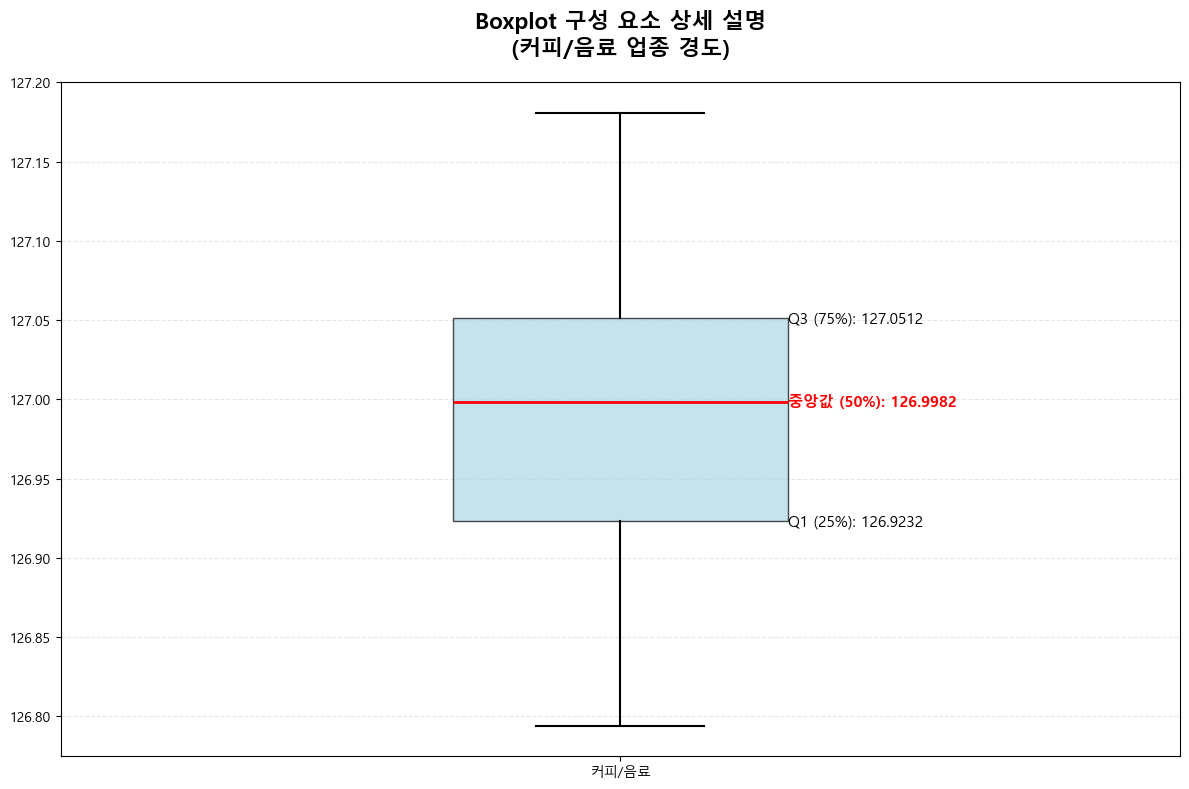

In [21]:
# Boxplot과 함께 구성 요소 표시
fig, ax = plt.subplots(figsize=(12, 8))

# Boxplot
bp = ax.boxplot([sample_industry], vert=True, widths=0.3, patch_artist=True,
                boxprops=dict(facecolor='lightblue', alpha=0.7),
                medianprops=dict(color='red', linewidth=2),
                whiskerprops=dict(linewidth=1.5),
                capprops=dict(linewidth=1.5))

# 주석 추가
ax.text(1.15, Q1, f'Q1 (25%): {Q1:.4f}', fontsize=11, va='center')
ax.text(1.15, Q2, f'중앙값 (50%): {Q2:.4f}', fontsize=11, va='center', 
        fontweight='bold', color='red')
ax.text(1.15, Q3, f'Q3 (75%): {Q3:.4f}', fontsize=11, va='center')

# 제목 및 레이블
ax.set_title('Boxplot 구성 요소 상세 설명\n(커피/음료 업종 경도)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_ylabel('', fontsize=12)
ax.set_xticklabels(['커피/음료'])
# ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1000000)}'))
ax.grid(True, axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.savefig('output/4_boxplot_components.png', dpi=300, bbox_inches='tight')
plt.show()

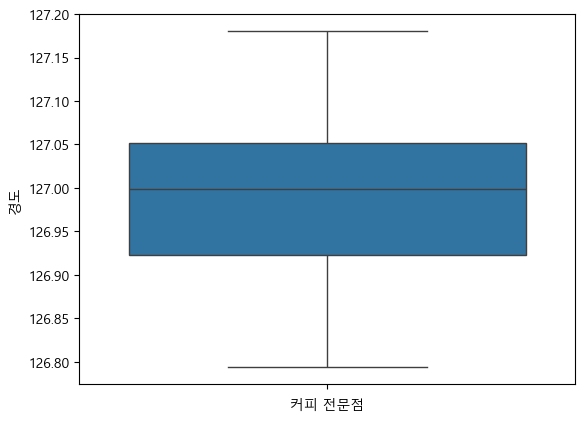

In [25]:
import seaborn as sns
sns.boxplot(new_df2[new_df2['표준산업분류명'] == '커피 전문점'],y = '경도')
plt.xlabel('커피 전문점')
plt.show()

<Axes: xlabel='경도', ylabel='위도'>

C:\Users\playdata2\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\playdata2\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


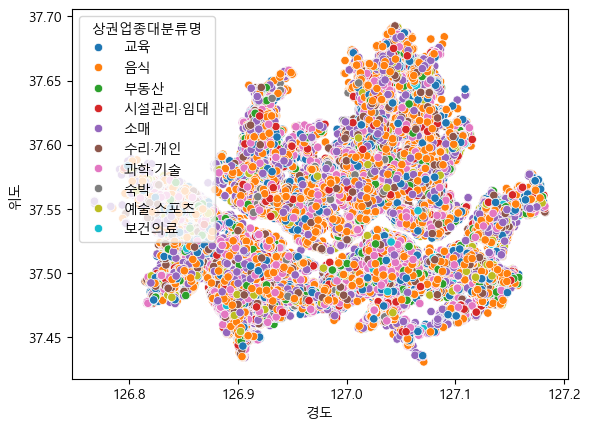

In [26]:
sns.scatterplot(df, x='경도', y='위도',hue='상권업종대분류명')

In [33]:
# 업종별로 개수를 count해서 top 5 업종을 대상으로 boxplot 
top5 = df['표준산업분류명'].value_counts()[:5].index.to_list()

In [ ]:
# 주요 업종 선택  
# 서비스업종코드명 --> 표준산업분류명
# 월매출금액 --> 위도
major_industries = top5
df_major = df[df['서비스업종코드명'].isin(major_industries)]

# 크기가 큰 Boxplot
fig, ax = plt.subplots(figsize=(14, 8))

# Seaborn boxplot with enhanced styling
sns.boxplot(data=df_major,
            x='서비스업종코드명',
            y='월매출금액',
            order=sorted(major_industries),
            palette='Set3',
            ax=ax,
            linewidth=1.5)

# 평균값 추가 (다이아몬드 마커)
means = df_major.groupby('서비스업종코드명')['월매출금액'].mean()
positions = range(len(sorted(major_industries)))
for pos, industry in enumerate(sorted(major_industries)):
    ax.scatter(pos, means[industry], marker='D', s=100, color='red', 
              zorder=3, label='평균' if pos == 0 else '')

# 그래프 꾸미기
ax.set_title('주요 업종별 월매출 분포 비교\n(빨간 다이아몬드 = 평균)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('월매출금액 (원)', fontsize=12)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1000000)}M'))
plt.xticks(rotation=45, ha='right')
ax.grid(True, axis='y', linestyle='--', alpha=0.3)
ax.legend(fontsize=11)

plt.tight_layout()
plt.savefig('output/4_multi_industry_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()